## 모듈 임포트

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

## 데이터 리딩 후 전처리

In [2]:
df = pd.read_csv("homework2.csv", sep=",")
df.head()
df = df.ix[:68]
df.tail()

,STORE,NAME,ST,ZIP,X,Y,TTL CTNS,MILES
0,192.0,GARDEN GR/HARBOR,CA,92840.0,-118.01,33.78,627151.0,51.0
1,193.0,GARDEN GR/BRKHURST,CA,92843.0,-117.93,33.76,385556.0,48.0
2,200.0,TORRANCE,CA,90505.0,-118.35,33.81,773359.0,66.0
3,212.0,RIVERSIDE,CA,92503.0,-117.45,33.90,475826.0,21.0
4,222.0,PUENTE HILLS,CA,91748.0,-117.90,33.98,437230.0,32.0


,STORE,NAME,ST,ZIP,X,Y,TTL CTNS,MILES
64,2304.0,WESTMINSTER NW,CA,92683.0,-118.01,33.75,460368.0,52.0
65,2328.0,CARSON,CA,90745.0,-118.29,33.81,641145.0,62.0
66,2397.0,LA HABRA,CA,90631.0,-117.96,33.92,554174.0,39.0
67,2482.0,BREA,CA,92821.0,-117.89,33.92,240483.0,35.0
68,2632.0,CULVER CITY,CA,90230.0,-118.39,33.99,240483.0,65.0


## Store 분포 확인

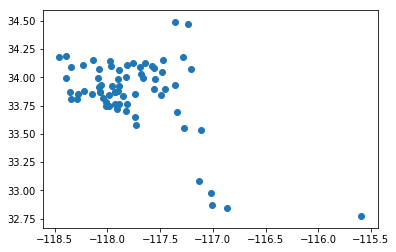

In [3]:
plt.scatter(df["X"], df["Y"])
plt.show();

## 평균값으로 optimum location 결정

In [4]:
df["X"].mean(), df["Y"].mean()

(-117.76608695652176, 33.864347826086956)

In [5]:
size = df["TTL CTNS"].astype(float)

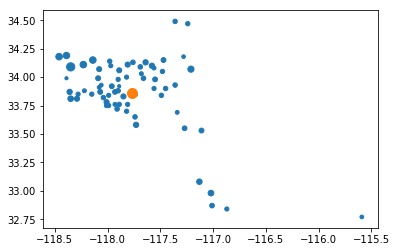

In [6]:
plt.scatter(df["X"], df["Y"], s=size / size.min() * 10)
plt.scatter(df["X"].mean(), df["Y"].mean(), s=100)
plt.show();

## 중력모형 적용

Cx= ∑ dix Vi/ ∑ Vi  
Cy= ∑ diy Vi/ ∑ Vi

In [7]:
x = df["X"]
y = df["Y"]
new_x = (x * size).sum() / size.sum()
new_y = (y * size).sum() / size.sum()
print(new_x, new_y)

-117.809842837 33.8817090279


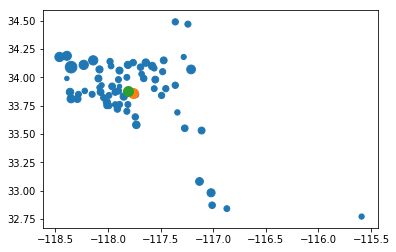

In [8]:
plt.scatter(x, y, s=size / size.min() * 20)
plt.scatter(x.mean(), y.mean(), s=100)
plt.scatter(new_x, new_y, s=100)
plt.show();

## 적절한 캘리포니아 도시 찾기

In [9]:
dx = (x - new_x) ** 2
dy = (y - new_y) ** 2
d = (dx + dy) ** 0.5
d.argmin()

8

#### Optimum에서 제일 가까운 곳

In [10]:
orange = df.ix[8]
orange

STORE          230
NAME        ORANGE
ST              CA
ZIP          92865
X          -117.85
Y            33.83
TTL CTNS    633804
MILES           40
Name: 8, dtype: object

In [11]:
orange["X"], orange["Y"]
new_x, new_y

(-117.84999999999999, 33.829999999999998)

(-117.80984283726237, 33.881709027897394)

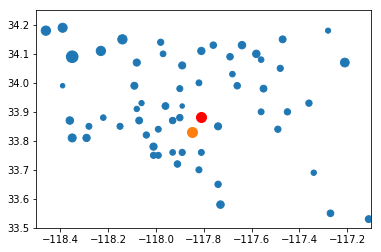

In [12]:
plt.scatter(x, y, s=size / size.min() * 20)
plt.scatter(new_x, new_y, s=100, c="red")
plt.scatter(orange["X"], orange["Y"], s=100)
plt.xlim(-118.5, -117.1)
plt.ylim(33.5, 34.25)
plt.show();